In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv")

In [3]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,6.685280e+06,6.685281e+06,6.685281e+06,6.685281e+06,6.685281e+06,6.685281e+06
mean,1.525993e+09,1.403937e+04,1.404551e+04,1.403304e+04,1.403939e+04,5.493203e+00
std,1.158067e+08,1.881954e+04,1.882700e+04,1.881195e+04,1.881963e+04,2.302263e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.425702e+09,4.091000e+02,4.093200e+02,4.089900e+02,4.090800e+02,1.817532e-02
50%,1.525992e+09,6.132170e+03,6.136360e+03,6.128070e+03,6.132190e+03,5.000000e-01
75%,1.626282e+09,2.247866e+04,2.248800e+04,2.246900e+04,2.247800e+04,3.202799e+00
max,1.726704e+09,7.379300e+04,7.379400e+04,7.373900e+04,7.379400e+04,5.853852e+03


**--------------------------------------------------------------------------------**
# Proje - Gözetimli Öğrenme
**--------------------------------------------------------------------------------**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

># Veri Setini Yükleme

In [5]:
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv")

> # Tarih dönüştürme

In [6]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

> # Eksik değerleri temizle

In [7]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
data.fillna(data.mean(), inplace=True)

> # Özellikler (X) ve hedef değişkeni (y) tanımla

In [9]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

> # Eğitim ve test setlerine ayırma

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> # Modeli oluştur ve eğit

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

> # Test seti üzerinde tahminler yapma

In [12]:
y_pred = model.predict(X_test)

> # Model değerlendirmesi

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 95.40488447841753
R2 Score: 0.9999997305684319


># Sonuçları bir DataFrame'de görme

In [15]:
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahminler': y_pred})
print(result_df.head())

         Gerçek Değerler    Tahminler
3305961          8081.94  8080.382907
4235022          8582.61  8581.712308
416947             11.94    11.938541
971429            239.49   239.491046
2226756           415.92   415.916655


> # Grafikleştirme

In [16]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Gerçek Değerler vs Tahminler')

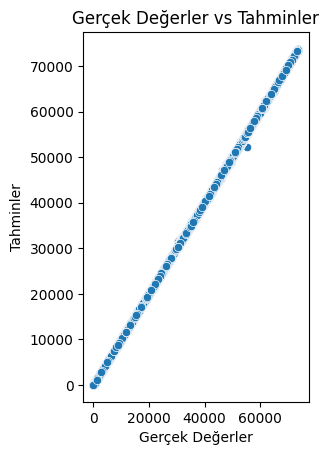

In [17]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.title('Gerçek Değerler vs Tahminler')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Tahmin Hatalarının Dağılımı')

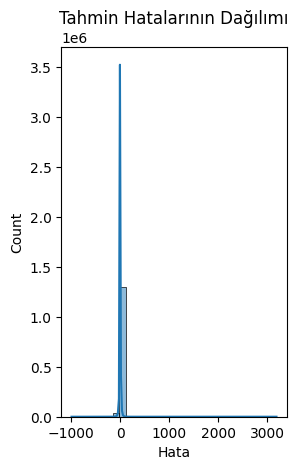

In [18]:
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel('Hata')
plt.title('Tahmin Hatalarının Dağılımı')

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

># # Pipeline oluşturma 

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LinearRegression())     
])

># Parametreleri Ayarlama 

In [21]:
param_grid = {
    'lr__fit_intercept': [True, False],  
    'lr__positive': [True, False]        
}

In [22]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'lr__fit_intercept': [True, False],
                         'lr__positive': [True, False]},
             scoring='neg_mean_squared_error')

> # En iyi parametreleri bulma

In [23]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'lr__fit_intercept': True, 'lr__positive': False}


> # Test seti üzerinde tahminler yap

In [24]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

># Metriklerini hesaplama

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Mean Squared Error after tuning: {mse}")
print(f"R2 Score after tuning: {r2}")

Mean Squared Error after tuning: 95.4048844784173
R2 Score after tuning: 0.9999997305684319


In [27]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Gerçek Değerler vs Tahminler (İyileştirilmiş Model)')

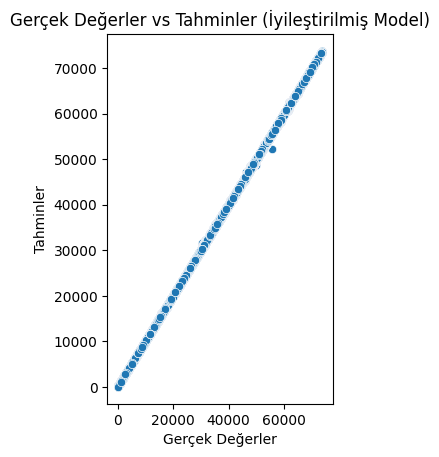

In [28]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.title('Gerçek Değerler vs Tahminler (İyileştirilmiş Model)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


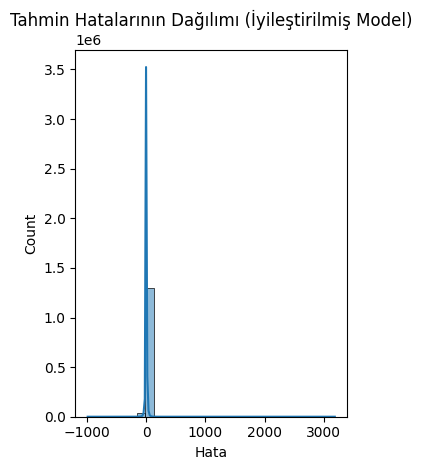

In [29]:
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel('Hata')
plt.title('Tahmin Hatalarının Dağılımı (İyileştirilmiş Model)')
plt.tight_layout()
plt.show()